# **Showing the different types of features that can be extracted**

In [53]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio

# Standard libraries
import numpy as np
import pandas as pd
import os
import time

# Libraries for audio
from IPython.display import Audio
import librosa
import librosa.display

# Training and Testing Split
from sklearn.model_selection import train_test_split

# for normalization & avgpooling features
import tensorflow as tf
# for preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Operational
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import scipy.ndimage
import pygame
import time
from scipy.signal import butter, filtfilt, freqz
import random
from functools import partial

In [54]:
sr = 22050  # Sample rate
audio_file_path = 'C:/Users/thato/Documents/Final-Year-Project/Dataset/Project-V4/train_audio_npy/'

In [55]:
# Variabels to be reused
train_csv = 'C:/Users/thato/Documents/Final-Year-Project/Dataset/Project-V4/train-not-annotated.csv' 

In [56]:
df_train = pd.read_csv(train_csv) # Reading in training data
df_train.head(30)

,Unnamed: 0,species,audio_name,duration,filename_npy
0,0,Ciconia ciconia,XC171088.mp3,32.470204,Ciconia ciconia/XC171088.npy
1,1,Alcedo atthis,XC503772.mp3,9.195102,Alcedo atthis/XC503772.npy
2,2,Himantopus himantopus,XC154289.mp3,30.484898,Himantopus himantopus/XC154289.npy
3,3,Motacilla flava,XC281358.mp3,30.746122,Motacilla flava/XC281358.npy
4,4,Acrocephalus melanopogon,XC406576.mp3,202.448980,Acrocephalus melanopogon/XC406576.npy
5,5,Alcedo atthis,XC442159.mp3,11.003900,Alcedo atthis/XC442159.npy
6,6,Ardea purpurea,XC276851.mp3,16.936599,Ardea purpurea/XC276851.npy
7,7,Gallinula chloropus,XC466994.mp3,6.803447,Gallinula chloropus/XC466994.npy
8,8,Gallinula chloropus,XC548742.mp3,13.598141,Gallinula chloropus/XC548742.npy
9,9,Acrocephalus arundinaceus,XC473571.mp3,98.385170,Acrocephalus arundinaceus/XC473571.npy


In [57]:
def bandpass_filter(audio, sr, lowcut=800, highcut=8000, order=4):
    nyquist = 0.5 * sr  # Nyquist frequency
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    filtered_audio = filtfilt(b, a, audio)
    return filtered_audio, b, a

In [58]:
def plot_bode_with_cutoff(b, a, lowcut, highcut, sr, filename):
    w, h = freqz(b, a, worN=1024)
    plt.figure(figsize=(12, 6))

    # Magnitude plot
    plt.subplot(2, 1, 1)
    plt.plot(0.5 * sr * w / np.pi, np.abs(h), 'b')
    plt.title('Bode Plot with Cutoff Frequencies')
    plt.axvline(lowcut, color='red', linestyle='--', label=f'Lowcut: {lowcut} Hz')
    plt.axvline(highcut, color='green', linestyle='--', label=f'Highcut: {highcut} Hz')
    plt.ylabel('Magnitude')
    plt.xlabel('Frequency [Hz]')
    plt.legend()
    plt.grid()

    # Phase plot
    plt.subplot(2, 1, 2)
    plt.plot(0.5 * sr * w / np.pi, np.angle(h), 'b')
    plt.ylabel('Phase [radians]')
    plt.xlabel('Frequency [Hz]')
    plt.grid()

    plt.tight_layout()
    plt.savefig(f'{filename}_bode_plot.pdf', dpi=300)
    plt.show()


In [59]:
# Function to plot frequency spectrum
def plot_frequency_spectrum(audio_data, sr, title, filename):
    N = len(audio_data)
    freq = np.fft.rfftfreq(N, d=1/sr)
    fft_vals = np.fft.rfft(audio_data)

    plt.figure(figsize=(12, 6))
    plt.plot(freq, np.abs(fft_vals), color='blue')
    plt.title(title)
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Magnitude')
    plt.xlim(0, sr / 2)  # Limit x-axis to Nyquist frequency
    plt.grid()
    plt.savefig(f'{filename}.pdf', dpi=300)
    plt.show()

In [60]:
def plot_waveform(audio_data, sr, filename, start_time, end_time):
    plt.figure(figsize=(12, 6))
    librosa.display.waveshow(audio_data, sr=sr)
    plt.title(f'Waveform from {start_time} to {end_time} seconds')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.savefig(f'{filename}_waveform.pdf', dpi=300)
    plt.show()

In [61]:
# Function to plot Mel Spectrogram, RMS, Chroma, and MFCCs
def plot_audio_features(audio_data, sr, filename):
    # Mel Spectrogram
    mel_spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sr, n_fft=2048, hop_length=512//2, n_mels=128)
    mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)
    display(f'Spectrogram shape: {mel_spectrogram_db.shape}')

    # MFCCs
    mfccs = librosa.feature.mfcc(y=audio_data, sr=sr, n_mfcc=20, hop_length=512//2)
    display(f'MFCC shape: {mfccs.shape}')

    # Chroma
    chroma = librosa.feature.chroma_stft(y=audio_data, sr=sr, hop_length=512//2)
    display(f'Chroma shape: {chroma.shape}')

    # RMS Energy
    rms = librosa.feature.rms(y=audio_data)

    # Compute the Constant-Q Transform (CQT)
    cqt = librosa.cqt(y=audio_data, sr=sr, hop_length=512//2)
    display(f'CQT shape: {cqt.shape}')

    # Convert the CQT magnitude to decibels for better visualization
    cqt_db = librosa.amplitude_to_db(np.abs(cqt), ref=np.max)

    # Plot each feature and save
    fig, ax = plt.subplots(1, figsize=(10, 6))
    librosa.display.specshow(mel_spectrogram_db, sr=sr, x_axis='time', y_axis='mel', ax=ax)
    ax.set_title('Mel Spectrogram')
    plt.savefig(f'{filename}_mel_spectrogram.pdf', dpi=300)
    plt.show()

    # fig, ax = plt.subplots(1, figsize=(10, 6))
    # librosa.display.specshow(mfccs, sr=sr, x_axis='time', ax=ax)
    # ax.set_title('MFCCs')
    # plt.savefig(f'{filename}_mfccs.pdf', dpi=300)
    # plt.show()
    # Plot MFCCs with labels
    fig, ax = plt.subplots(1, figsize=(10, 6))
    librosa.display.specshow(mfccs, sr=sr, x_axis='time', ax=ax)
    ax.set_title('MFCCs')
    ax.set_ylabel('MFCC Coefficients')
    ax.set_xlabel('Time (seconds)')
    ax.set_yticks(np.arange(20))  # Set yticks for 13 MFCC coefficients
    ax.set_yticklabels([f'MFCC {i+1}' for i in range(20)])  # Label each MFCC coefficient
    plt.savefig(f'{filename}_mfccs.pdf', dpi=300)
    plt.show()


    # fig, ax = plt.subplots(1, figsize=(10, 6))
    # librosa.display.specshow(chroma, sr=sr, x_axis='time', ax=ax)
    # ax.set_title('Chroma Features')
    # plt.savefig(f'{filename}_chroma.pdf', dpi=300)
    # plt.show()
    fig, ax = plt.subplots(1, figsize=(10, 6))
    librosa.display.specshow(chroma, sr=sr, x_axis='time', ax=ax)
    ax.set_title('Chroma Features')
    ax.set_ylabel('Chroma Pitch Classes')
    ax.set_xlabel('Time (seconds)')
    ax.set_yticks(np.arange(12))  # Set yticks for 12 pitch classes
    ax.set_yticklabels(['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B'])  # Label pitch classes
    plt.savefig(f'{filename}_chroma.pdf', dpi=300)
    plt.show()

    # Plot the RMS
    fig, ax = plt.subplots(1, figsize=(10, 6))
    ax.plot(librosa.times_like(rms), rms[0], label='RMS Energy', color='orange')
    ax.set_title('RMS Energy')
    plt.savefig(f'{filename}_rms.pdf', dpi=300)
    plt.show()

    # Plot the CQT
    fig, ax = plt.subplots(1, figsize=(10, 6))
    librosa.display.specshow(cqt_db, sr=sr, hop_length=512//2, x_axis='time', y_axis='cqt_note')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Constant-Q Transform (CQT) with hop_length=256')
    plt.xlabel('Time (s)')
    plt.ylabel('Notes (CQT)')
    plt.savefig(f'{filename}_cqt.pdf', dpi=300)
    plt.show()

In [62]:
def process_audio(file_path, start_time, end_time, sr=22050, lowcut=800, highcut=8000, order=4):
    # Load the full audio from .npy file
    audio_data = np.load(audio_file_path+file_path)

    # Convert start and end time to sample indices
    start_sample = int(start_time * sr)
    end_sample = int(end_time * sr)

    # Extract the section of the audio
    audio_section = audio_data[start_sample:end_sample]

    # Play the selected section
    display(Audio(audio_section, rate=sr))

    # Generate filename based on time window
    filename = f'{file_path.split("/")[-1].split(".")[0]}_{start_time}_{end_time}'
    plot_waveform(audio_section, sr, filename, start_time, end_time)

    # Plot the frequency spectrum of the original audio section
    plot_frequency_spectrum(audio_section, sr, 'Original Audio Frequency Spectrum', f'{filename}_original_spectrum')

    # Apply bandpass filter
    filtered_audio, b, a = bandpass_filter(audio_section, sr, lowcut, highcut, order)

    # Plot the frequency spectrum of the filtered audio
    plot_frequency_spectrum(filtered_audio, sr, 'Filtered Audio Frequency Spectrum', f'{filename}_filtered_spectrum')

    # Plot the Bode plot with cutoff frequencies highlighted
    plot_bode_with_cutoff(b, a, lowcut, highcut, sr, filename)

    # Plot the audio features of the filtered audio
    plot_audio_features(audio_section, sr, filename)

In [63]:
# path ='Acrocephalus melanopogon/XC542357.npy'
# path = 'Himantopus himantopus/XC154289.npy'
path = 'Botaurus stellaris/XC172692.npy'
start_time = 2  # Specify start time in seconds
end_time = 6  # Specify end time in seconds

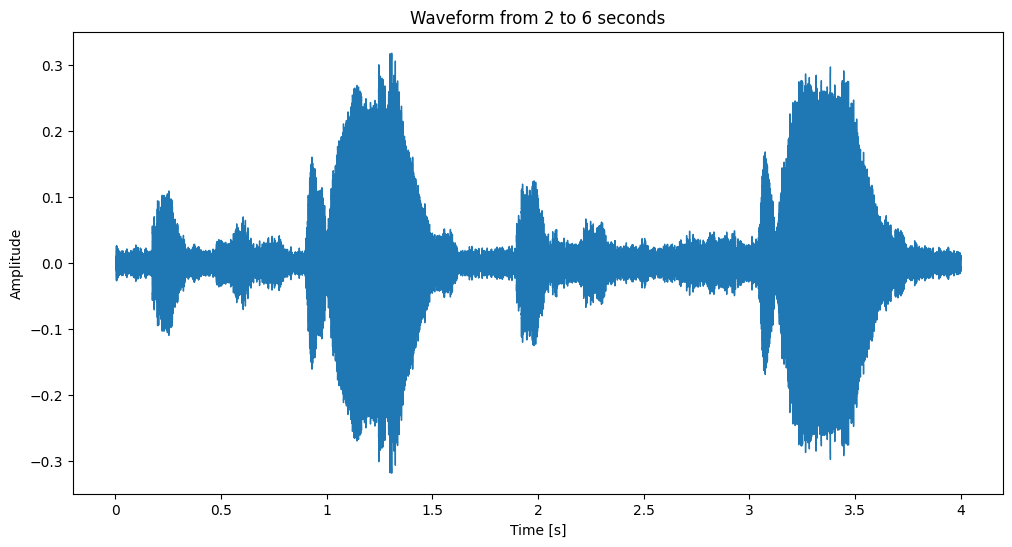

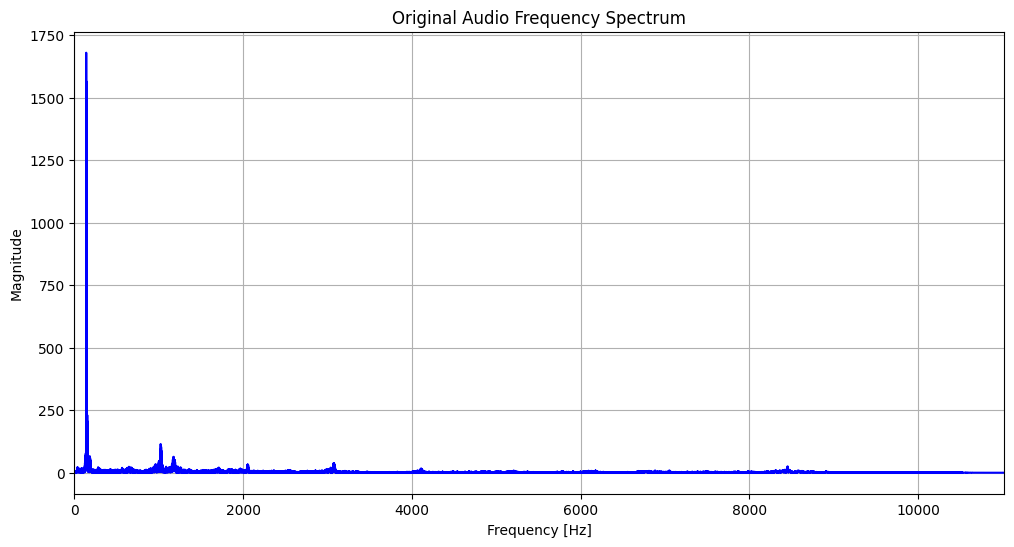

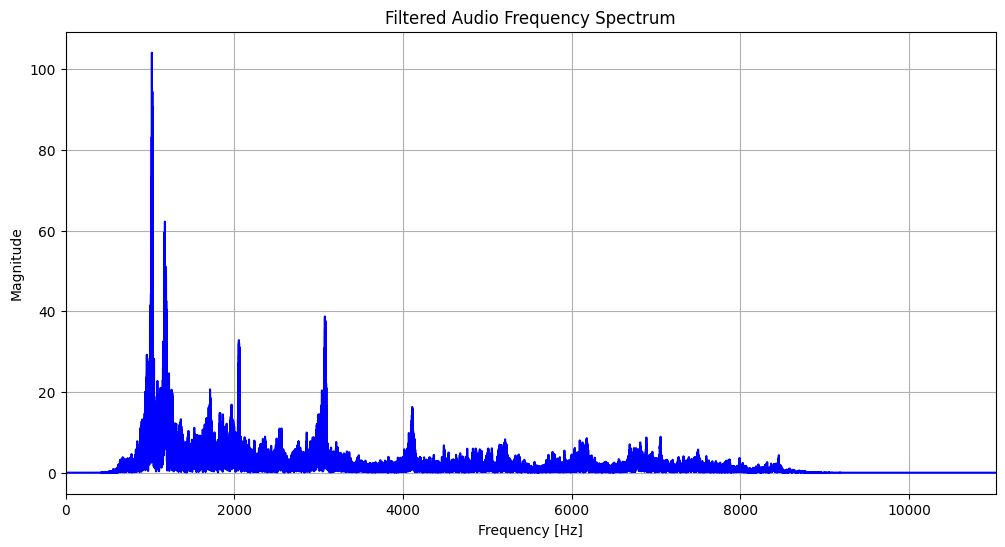

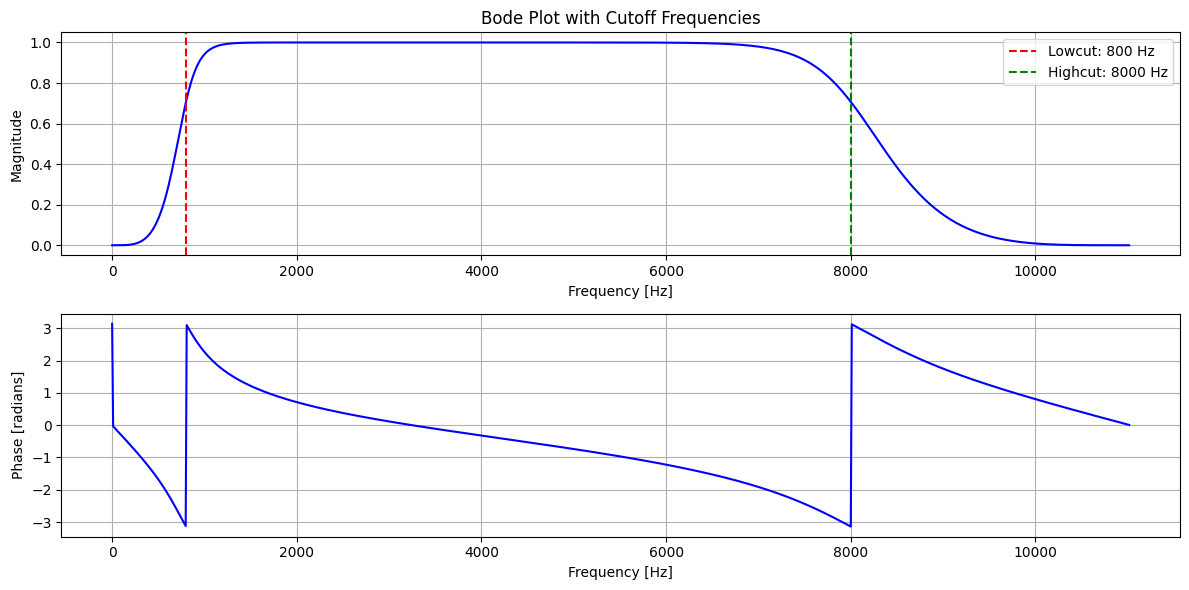

'Spectrogram shape: (128, 345)'

'MFCC shape: (20, 345)'

'Chroma shape: (12, 345)'

'CQT shape: (84, 345)'

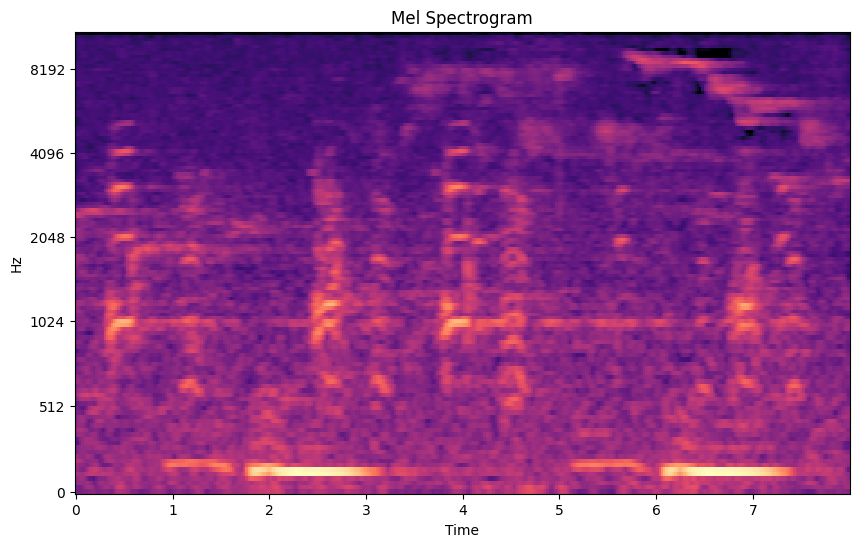

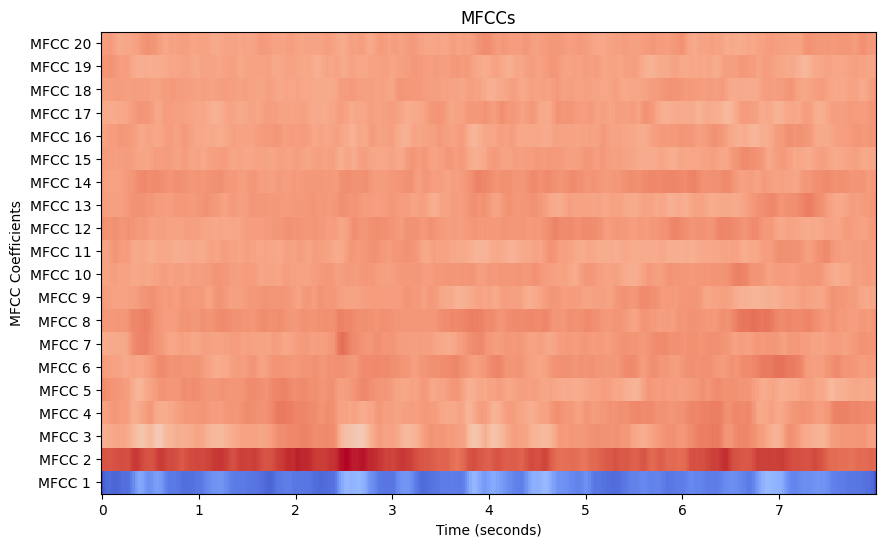

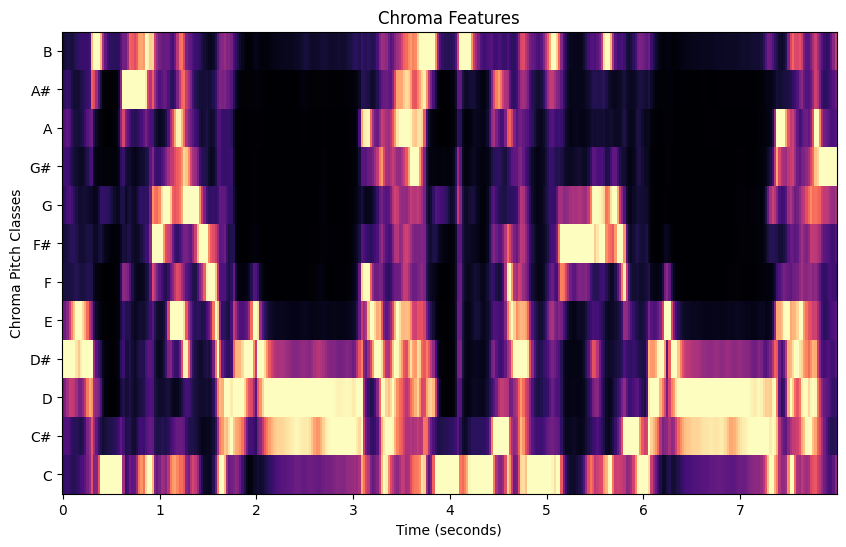

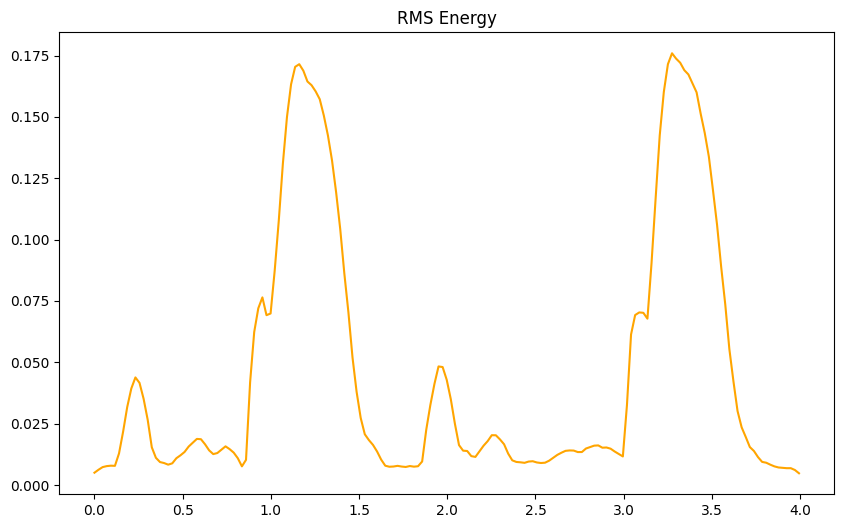

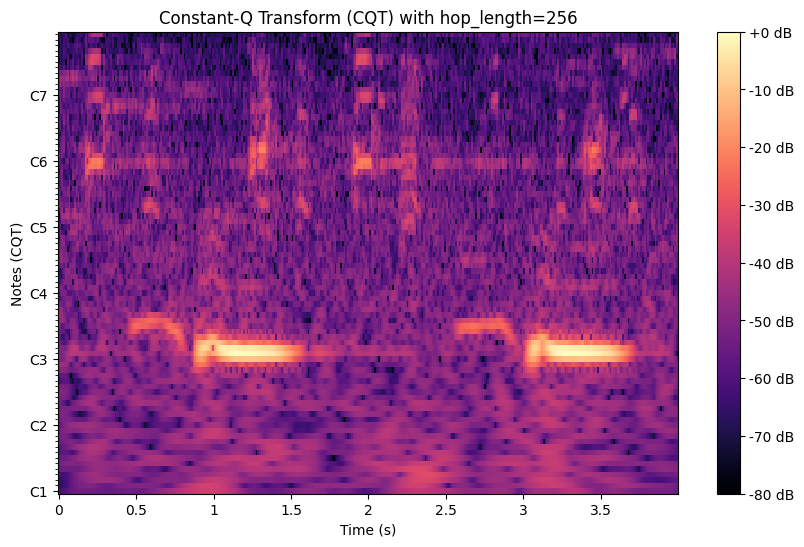

In [64]:
process_audio(path, start_time, end_time)